# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image

# Data Set

In [2]:
data =  h5py.File("dataset/train_catvnoncat.h5", "r")

keys = list(data.keys())
values = list(data.values())

list_classes = np.array(data[keys[0]])
train_set_x = np.array(data[keys[1]])
train_set_y = np.array(data[keys[2]])

print("Keys: ")
for index, key in enumerate(keys):
    print(f"\t{index+1}-{key}")

print("\nValues: ")
for index, value in enumerate(values):
    print(f"\t{index+1}-{value}")

print("\nList Classes: ")
for index, item in enumerate(list_classes):
    print(f"\t{index+1}-{item}")


data_test =  h5py.File("dataset/test_catvnoncat.h5", "r")

keys_test = list(data_test.keys())
values_test = list(data_test.values())

list_classes_test = np.array(data_test[keys_test[0]])
test_set_x = np.array(data_test[keys_test[1]])
test_set_y = np.array(data_test[keys_test[2]])



Keys: 
	1-list_classes
	2-train_set_x
	3-train_set_y

Values: 
	1-<HDF5 dataset "list_classes": shape (2,), type "|S7">
	2-<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">
	3-<HDF5 dataset "train_set_y": shape (209,), type "<i8">

List Classes: 
	1-b'non-cat'
	2-b'cat'


# Plot records

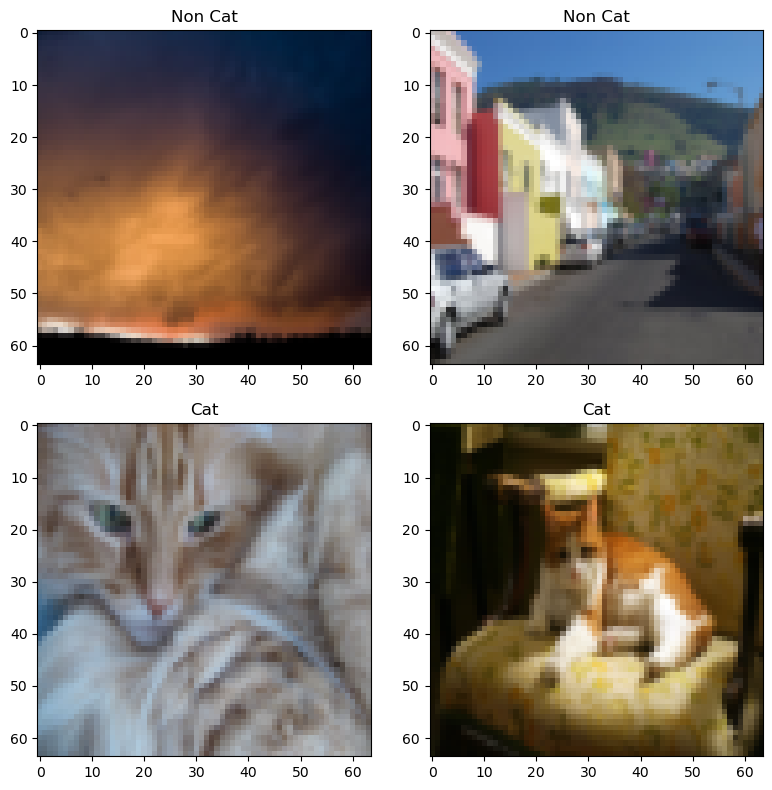

In [3]:
record1_rgb = np.array(train_set_x[0], dtype=np.uint8)
record2_rgb = np.array(train_set_x[1], dtype=np.uint8)
record3_rgb = np.array(train_set_x[2], dtype=np.uint8)
record8_rgb = np.array(train_set_x[7], dtype=np.uint8)


fig, axs = plt.subplots(2, 2, figsize=(8, 8))

title1 = "Cat" if train_set_y[0] else "Non Cat"
axs[0, 0].set_title(title1)
axs[0, 0].imshow(record1_rgb)

title2 = "Cat" if train_set_y[1] else "Non Cat"
axs[0, 1].set_title(title2)
axs[0, 1].imshow(record2_rgb)

title3 = "Cat" if train_set_y[2] else "Non Cat"
axs[1, 0].set_title(title3)
axs[1, 0].imshow(record3_rgb)

title4 = "Cat" if train_set_y[7] else "Non Cat"
axs[1, 1].set_title(title4)
axs[1, 1].imshow(record8_rgb)

plt.tight_layout()
plt.show()


# Flatten Data

In [4]:
train_set_x = train_set_x.reshape(train_set_x.shape[0], 64*64*3) / 255
test_set_x = test_set_x.reshape(test_set_x.shape[0], 64*64*3) / 255

print(train_set_x.shape)
print(test_set_x.shape)

(209, 12288)
(50, 12288)


# Initialize W's & b's

In [5]:
def initialize(columns):
    return np.zeros(columns), 0.0

# Sigmoid

In [6]:
def sigmoid(X, w, b):    
    return 1 / (1 + np.exp(-(np.dot(X, w) + b)))

# Cost

In [7]:
def cost(X, y, w, b):
    m, _ = X.shape    
    f = sigmoid(X, w, b)
    return np.sum(-(y*np.log(f)+(1-y)*np.log(1-f))) / m

# Gradient

In [8]:
def gradient(X, y, w, b):
    m, _ = X.shape
    
    error = sigmoid(X, w, b) - y
    
    d_dw = np.dot(error, X) / m
    d_db = np.sum(error) / m    

    return d_dw, d_db    

# Gradient Descent

In [9]:
def gradient_descent(X: np.ndarray, y, w_in, b_in, gradient, J, alpha, iterations):
    history = {}
    w = w_in
    b = b_in

    for i in range(iterations+1):        
        d_dw, d_db = gradient(X, y, w, b)
        w -= alpha * d_dw
        b -= alpha * d_db

        cost = J(X, y, w, b)
        if i % 100 == 0:
            print(f"Iteration: {i}\t|\tcost: {cost}")
        history[i] = cost

    out = {
        "w": w,
        "b": b,
        "cost": cost,
        "alpha": alpha,
        "iteration": iterations,        
    }

    return out, history

In [10]:
w_in, b_in = initialize(train_set_x.shape[1])
alpha = 0.0004
iterations = 300_000

model, history = gradient_descent(train_set_x, train_set_y, w_in, b_in, gradient, cost, alpha, iterations)

w_final = model["w"]
b_final = model["b"]

print(f"\n\nOptimum Result -->\nw: {w_final}\nb: {b_final}")

Iteration: 0	|	cost: 0.6770654119999754
Iteration: 100	|	cost: 0.6217736333209964
Iteration: 200	|	cost: 0.6001472567230024
Iteration: 300	|	cost: 0.5829769687111583
Iteration: 400	|	cost: 0.568451362991042
Iteration: 500	|	cost: 0.5557024817000875
Iteration: 600	|	cost: 0.5442535510907552
Iteration: 700	|	cost: 0.5338111603963743
Iteration: 800	|	cost: 0.5241787682984779
Iteration: 900	|	cost: 0.5152165614099324
Iteration: 1000	|	cost: 0.5068207352669253
Iteration: 1100	|	cost: 0.4989117452047413
Iteration: 1200	|	cost: 0.49142711605893175
Iteration: 1300	|	cost: 0.48431677855001515
Iteration: 1400	|	cost: 0.4775399108011261
Iteration: 1500	|	cost: 0.47106272848146846
Iteration: 1600	|	cost: 0.4648568989601422
Iteration: 1700	|	cost: 0.45889837949281187
Iteration: 1800	|	cost: 0.45316655094585656
Iteration: 1900	|	cost: 0.44764356178009096
Iteration: 2000	|	cost: 0.44231382424752763
Iteration: 2100	|	cost: 0.43716362247226626
Iteration: 2200	|	cost: 0.43218080390874375
Iteration: 2300

# Plot Cost

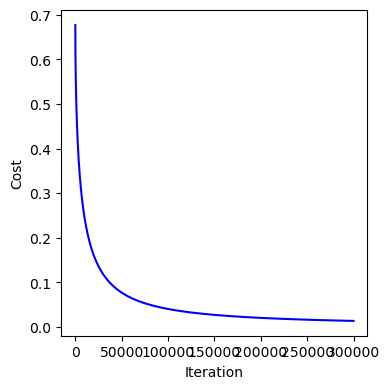

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(4, 4))

axs.set_xlabel("Iteration")
axs.set_ylabel("Cost")
axs.plot(list(history.keys()), list(history.values()), color="blue")

plt.tight_layout()
plt.show()

# Predict

In [12]:
def is_cat(X, w, b):
    f = sigmoid(X, w, b)
    if 0.5 <= f <= 1:
        return 1
    elif 0 <= f < 0.5:
        return 0

# Test & Accuracy

In [13]:
def test(X, Y, w, b):
    sum = 0        
    m, _ = X.shape
    for i in range(m):
        model_output = is_cat(X[i], w, b)
        actual_output = Y[i]        
        print(f"{X[i]} -> model -> {model_output}\t|\tactual output -> {actual_output}")
        sum += (1 - abs(model_output - actual_output)) * 100
    return sum/m

test_accuracy = test(test_set_x, test_set_y, w_final, b_final)
print("Test:")
print(f"\n\n**********************\n*** Accuracy {round(test_accuracy, 2)}% ***\n**********************")

print("\nTrain:")
test_accuracy_train_set = test(train_set_x, train_set_y, w_final, b_final)
print(f"\n\n**********************\n*** Accuracy {round(test_accuracy_train_set, 2)}% ***\n**********************")

[0.61960784 0.40784314 0.3254902  ... 0.67843137 0.50196078 0.43137255] -> model -> 1	|	actual output -> 1
[0.45098039 0.43137255 0.43529412 ... 0.67058824 0.69019608 0.72941176] -> model -> 1	|	actual output -> 1
[1.         0.99215686 0.99607843 ... 0.52156863 0.39607843 0.4745098 ] -> model -> 1	|	actual output -> 1
[0.99607843 0.99607843 0.95294118 ... 0.50588235 0.32941176 0.16862745] -> model -> 1	|	actual output -> 1
[0.37647059 0.28235294 0.24313725 ... 0.57254902 0.51764706 0.51764706] -> model -> 1	|	actual output -> 1
[0.10196078 0.20784314 0.11764706 ... 0.19607843 0.28627451 0.2       ] -> model -> 0	|	actual output -> 0
[0.9372549 1.        1.        ... 1.        1.        1.       ] -> model -> 0	|	actual output -> 1
[0.9254902  0.94901961 0.86666667 ... 0.10980392 0.27058824 0.45098039] -> model -> 1	|	actual output -> 1
[0.0745098  0.09411765 0.10980392 ... 0.22745098 0.23921569 0.22352941] -> model -> 1	|	actual output -> 1
[0.90588235 0.84705882 0.85490196 ... 0.466

# Image Input

In [14]:
def image_input(fname):
    image = np.array(Image.open(fname, "r").resize((64, 64)))
    flaten = image.reshape((64*64*3)) / 255
    return image, flaten

# Real-World Images

In [15]:
image0, flatten0 = image_input("images/2dogs.jpg")
image1, flatten1 = image_input("images/blur.jpg")
image2, flatten2 = image_input("images/cat&dog.jpg")
image3, flatten3 = image_input("images/img.jpg")
image4, flatten4 = image_input("images/mask2.jpg")
image5, flatten5 = image_input("images/maybe.jpg")

# Plot Results

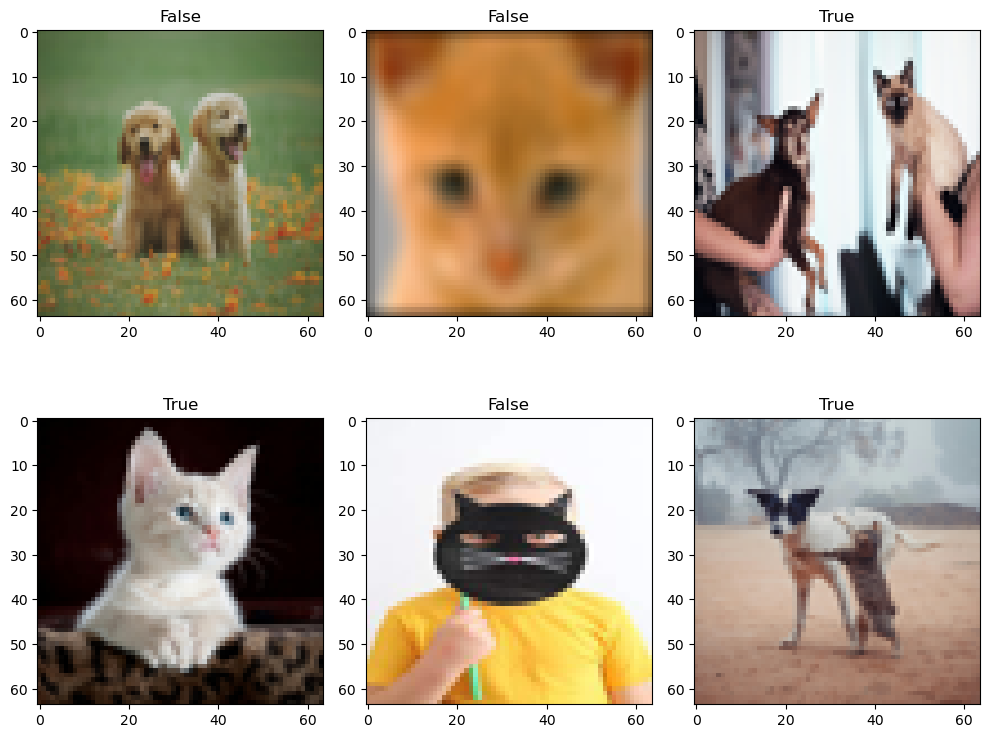

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8))
axs = axs.flatten()

images = [image0, image1, image2, image3, image4, image5]
results = [flatten0, flatten1, flatten2, flatten3, flatten4, flatten5]
titles = [bool(is_cat(result, w_final, b_final)) for result in results]

for i, ax in enumerate(axs):
    try:
        ax.set_title(titles[i])
        ax.imshow(images[i])
    except Exception as e:
        print(e)
        pass

plt.tight_layout()
plt.show()

In [17]:
model["w"] = list(model["w"])

# Output

In [18]:
with open('parameters.json', 'w') as f:
    f.write(str(model))